<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/DataScience_Post_Covid19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POST - COVID19 데이터 시각화 경진대회

* 가설 1: 코로나 이후 배달량이 늘어 배달완료시간이 오래 걸릴 것이다.

필요한 library 불러오기기

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import datetime
import matplotlib.pyplot as plt

google drive mount 해준 뒤, delivery.csv 파일 읽기 head() 함수는 파일 간단히 보여줌.

In [2]:
delivery = pd.read_csv('/content/drive/MyDrive/Post_Covid19/delivery.csv', usecols = ['SERIAL_NUMBER','PROCESS_DT','DLVR_DSTN_SIDO','DLVR_RCEPT_TIME', 'DLVR_COMPT_TIME'])
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,DLVR_RCEPT_TIME,DLVR_COMPT_TIME
0,4577985,2020-01-01,경상남도,2020-01-01 00:15:49,2020-01-01 00:41:37
1,4577986,2020-01-01,서울특별시,2020-01-01 01:12:14,2020-01-01 01:31:44
2,4577988,2020-01-01,서울특별시,2020-01-01 00:01:14,2020-01-01 00:18:47
3,4577989,2020-01-01,경기도,2020-01-01 01:01:34,2020-01-01 01:36:48
4,4577991,2020-01-01,경기도,2020-01-01 01:05:06,2020-01-01 01:29:00


* SERIAL_NUMBER : 순번
* PROCESS_DT : 처리일시
* DLVR_RQESTER_ID : 배달요청업체 ID
* DLVR_REQUST_STTUS_VALUE : 배달요청상태값( 1:완료, 2:취소, 3:사고, 4:문의)
* DLVR_RCEPT_CMPNY_ID : 배달접수회사 ID
* DLVR_STORE_ID : 배달상점 ID
* DLVR_STORE_INDUTY_NM : 배달상점 업종이름
* DLVR_STORE_LEGALDONG_CODE : 배달상점 주소 법정동코드
* DLVR_STORE_SIDO : 배달상점 주소 법정동 시도명
* DLVR_STORE_SIGUNGU : 배달상점 주소 법정동 시군구명
* DLVR_STORE_DONG : 배달상점 주소 법정동 읍면동명
* DLVR_STORE_RI : 배달상점 주소 법정동 리명
* DLVR_STORE_ADSTRD_CODE : 배달상점 주소 행정동 코드
* DLVR_STORE_RDNMADR_CODE : 배달상점주소 도로명주소 코드
* DLVR_DSTN_LEGALCONG_CODE : 배달목적지 주소 법정동코드
* DLVR_DSTN_SIDO : 배달목적지 주소 법정동 시도명
* DLVR_DSTN_SIGUNGU : 배달목적지 주소 법정동 시군구명
* DLVR_DSTN_DONG : 배달목적지 주소 법정동 읍면동명
* DLVR_DSTN_RI : 배달목적지 주소 법정동 리명
* DLVR_DSTN_ADSTRD_CODE: 배달목적지 주소 행정동 코드
* DLVR_DSTN_RDNMADR_CODE : 배달목적지주소 도로명주소 코드
* DLVR_MAN_ID : 배달기사 ID
* DLVR_AMOUNT : 배달비용
* CALL_RLAY_FEE_AMOUNT : 호출중계수수료금액
* GOODS_AMOUNT : 배달상품금액
* SETLE_KND_VALUE : 결제종류번호 (1:카드, 2:선불, 3:현금)
* SETLE_CARD_CN : 결제카드종류
* DLVR_RCEPT_TIME : 배달접수시간
* DLVR_CARALC_TIME : 배달배차시간
* DLVR_COMPT_TIME : 배달완료시간
* DLVR_CANCL_TIME : 배달취소시간

delivery의 'DLVR_RCEPT_TIME', 'DLVR_COMPT_TIME', 'PROCESS_DT'의 type 확인

In [3]:
type(delivery['DLVR_RCEPT_TIME'][0])

str

In [4]:
type(delivery['DLVR_COMPT_TIME'][0])

str

In [5]:
type(delivery['PROCESS_DT'][0])

str

datatime type으로 바꿔주기

In [6]:
delivery['DLVR_RCEPT_TIME'] = pd.to_datetime(delivery['DLVR_RCEPT_TIME'])
delivery['DLVR_COMPT_TIME'] = pd.to_datetime(delivery['DLVR_COMPT_TIME'])
delivery['PROCESS_DT'] = pd.to_datetime(delivery['PROCESS_DT'])

바뀐 type 확인

In [7]:
type(delivery['DLVR_RCEPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
type(delivery['DLVR_COMPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
type(delivery['PROCESS_DT'][0])

pandas._libs.tslibs.timestamps.Timestamp

배달시간 계산

In [10]:
time = Series(delivery['DLVR_COMPT_TIME'] - delivery['DLVR_RCEPT_TIME'], dtype = 'object')
time

0          0 days 00:25:48
1          0 days 00:19:30
2          0 days 00:17:33
3          0 days 00:35:14
4          0 days 00:23:54
                ...       
5158319    0 days 00:19:25
5158320    0 days 00:21:05
5158321    0 days 00:19:37
5158322    0 days 00:14:32
5158323    0 days 00:23:32
Length: 5158324, dtype: object

time의 value 값들만 확인

In [11]:
time.values

array([Timedelta('0 days 00:25:48'), Timedelta('0 days 00:19:30'),
       Timedelta('0 days 00:17:33'), ..., Timedelta('0 days 00:19:37'),
       Timedelta('0 days 00:14:32'), Timedelta('0 days 00:23:32')],
      dtype=object)

In [12]:
type(time.values[0])

pandas._libs.tslibs.timedeltas.Timedelta

time을 계산하기 위해 초로 바꾸기

In [13]:
time.values[1].seconds

1170

second 리스트에 값 저장하기

In [14]:
second = []
for i in range(len(time.values)):
  s = time.values[i].seconds
  second.append(s)
second[:10]
len(second)

5158324

In [15]:
second = pd.Series(second)
second[:3] #간단히 보기 위해 3개만 출력

0    1548.0
1    1170.0
2    1053.0
dtype: float64

In [16]:
second = DataFrame(second,columns = ['second'])
second.head()

,second
0,1548.0
1,1170.0
2,1053.0
3,2114.0
4,1434.0


delivery dataframe과 second dataframe 결합.

In [17]:
df = pd.merge(delivery, second, left_index = True, right_index = True)
df.head(10)

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,DLVR_RCEPT_TIME,DLVR_COMPT_TIME,second
0,4577985,2020-01-01,경상남도,2020-01-01 00:15:49,2020-01-01 00:41:37,1548.0
1,4577986,2020-01-01,서울특별시,2020-01-01 01:12:14,2020-01-01 01:31:44,1170.0
2,4577988,2020-01-01,서울특별시,2020-01-01 00:01:14,2020-01-01 00:18:47,1053.0
3,4577989,2020-01-01,경기도,2020-01-01 01:01:34,2020-01-01 01:36:48,2114.0
4,4577991,2020-01-01,경기도,2020-01-01 01:05:06,2020-01-01 01:29:00,1434.0
5,4577993,2020-01-01,경기도,2020-01-01 00:59:31,2020-01-01 01:25:41,1570.0
6,4577994,2020-01-01,서울특별시,2020-01-01 01:27:00,2020-01-01 01:41:45,885.0
7,4577995,2020-01-01,경기도,2020-01-01 00:09:40,2020-01-01 00:32:24,1364.0
8,4577996,2020-01-01,서울특별시,2020-01-01 00:51:49,2020-01-01 01:23:41,1912.0
9,4577997,2020-01-01,경기도,2020-01-01 00:10:34,2020-01-01 00:26:04,930.0


월별과 주별로 배달완료 시간 확인하기

In [18]:
seoul = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'seoul'])
seoul.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
0,4577985,2020-01-01,경상남도,1548.0,NaN
1,4577986,2020-01-01,서울특별시,1170.0,NaN
2,4577988,2020-01-01,서울특별시,1053.0,NaN
3,4577989,2020-01-01,경기도,2114.0,NaN
4,4577991,2020-01-01,경기도,1434.0,NaN


In [19]:
seoul['seoul'] = seoul['DLVR_DSTN_SIDO'] == '서울특별시'
droped = seoul[seoul['seoul'] == False].index
seoul = seoul.drop(droped)
seoul.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
1,4577986,2020-01-01,서울특별시,1170.0,True
2,4577988,2020-01-01,서울특별시,1053.0,True
6,4577994,2020-01-01,서울특별시,885.0,True
8,4577996,2020-01-01,서울특별시,1912.0,True
22,4578012,2020-01-01,서울특별시,1855.0,True


In [20]:
seoul.index = seoul['PROCESS_DT']
seoul_complete_week = seoul.resample('W').mean()
seoul_complete_month = seoul.resample('M').mean()
seoul_complete_month.head()

,SERIAL_NUMBER,second,seoul
PROCESS_DT,,,
2020-01-31,5.062613e+06,1168.661095,True
2020-02-29,6.083589e+06,1297.683700,True
2020-03-31,7.177649e+06,1180.844187,True
2020-04-30,8.312214e+06,1067.320722,True
2020-05-31,9.495399e+06,1110.682574,True


Text(0.5, 1.0, 'delivery completion time of seoul(Week)')

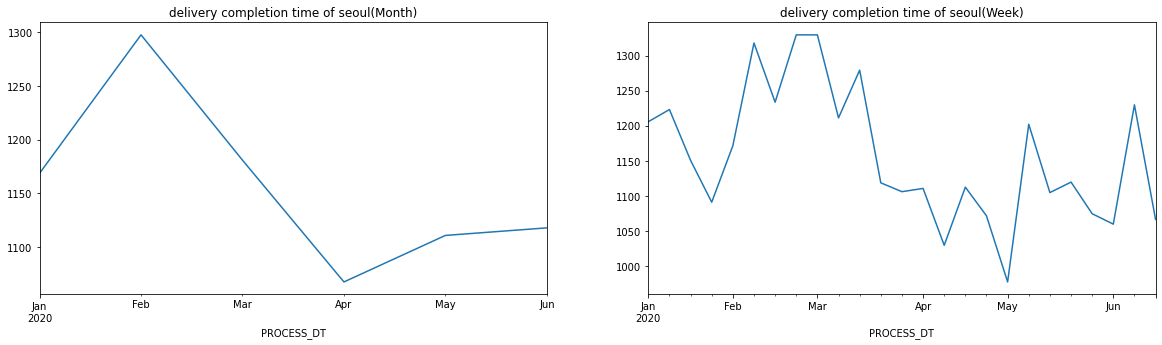

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
seoul_complete_month['second'].plot(ax = axes[0])
seoul_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of seoul(Month)')
axes[1].set_title('delivery completion time of seoul(Week)')

In [22]:
gyeonggido = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'gyeonggido'])
gyeonggido['gyeonggido'] = gyeonggido['DLVR_DSTN_SIDO'] == '경기도'
droped = gyeonggido[gyeonggido['gyeonggido'] == False].index
gyeonggido = gyeonggido.drop(droped)
gyeonggido.index = gyeonggido['PROCESS_DT']
gyeonggido_complete_week = gyeonggido.resample('W').mean()
gyeonggido_complete_month = gyeonggido.resample('M').mean()
gyeonggido_complete_month.head()

,SERIAL_NUMBER,second,gyeonggido
PROCESS_DT,,,
2020-01-31,5.065194e+06,1112.457422,True
2020-02-29,6.081852e+06,1183.421484,True
2020-03-31,7.176433e+06,1054.899543,True
2020-04-30,8.325291e+06,986.418988,True
2020-05-31,9.498383e+06,1008.635046,True


Text(0.5, 1.0, 'delivery completion time of gyeonggido(Week)')

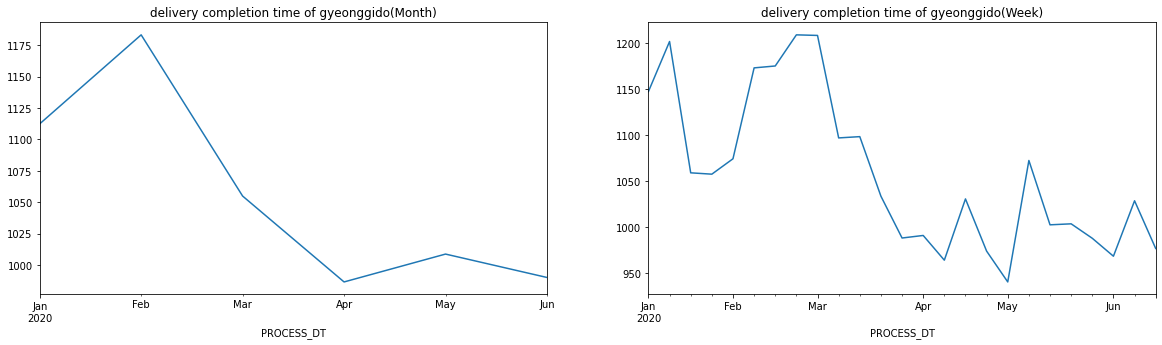

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
gyeonggido_complete_month['second'].plot(ax = axes[0])
gyeonggido_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of gyeonggido(Month)')
axes[1].set_title('delivery completion time of gyeonggido(Week)')

In [24]:
incheon = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'incheon'])
incheon['incheon'] = incheon['DLVR_DSTN_SIDO'] == '인천광역시'
droped = incheon[incheon['incheon'] == False].index
incheon = incheon.drop(droped)
incheon.index = incheon['PROCESS_DT']
incheon_complete_week = incheon.resample('W').mean()
incheon_complete_month = incheon.resample('M').mean()
incheon_complete_month.head()

,SERIAL_NUMBER,second,incheon
PROCESS_DT,,,
2020-01-31,5.079027e+06,1066.579665,True
2020-02-29,6.074581e+06,1087.745786,True
2020-03-31,7.169542e+06,954.143801,True
2020-04-30,8.322494e+06,914.318156,True
2020-05-31,9.510233e+06,950.589895,True


Text(0.5, 1.0, 'delivery completion time of incheon(Week)')

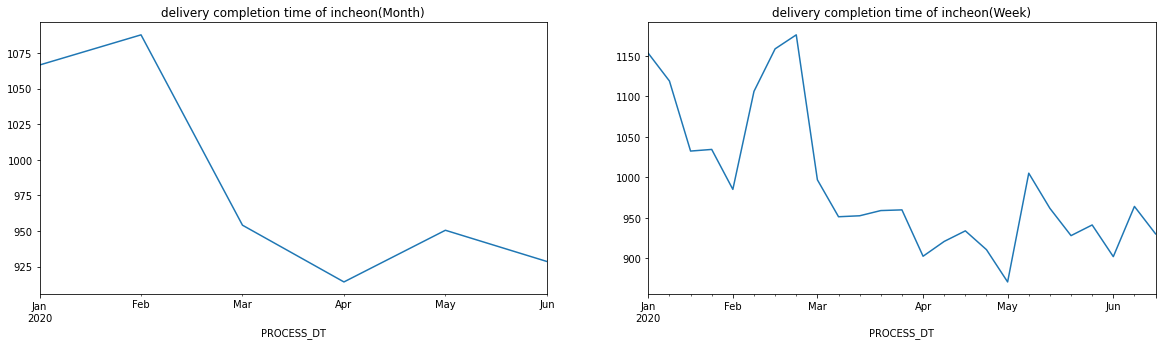

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
incheon_complete_month['second'].plot(ax = axes[0])
incheon_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of incheon(Month)')
axes[1].set_title('delivery completion time of incheon(Week)')

In [26]:
busan = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'busan'])
busan['busan'] = busan['DLVR_DSTN_SIDO'] == '부산광역시'
droped = busan[busan['busan'] == False].index
busan = busan.drop(droped)
busan.index = busan['PROCESS_DT']
busan_complete_week = busan.resample('W').mean()
busan_complete_month = busan.resample('M').mean()
busan_complete_month.head()

,SERIAL_NUMBER,second,busan
PROCESS_DT,,,
2020-01-31,4.876816e+06,901.961231,True
2020-02-29,6.142427e+06,1558.712815,True
2020-03-31,7.164208e+06,1620.965382,True
2020-04-30,8.328774e+06,993.183480,True
2020-05-31,9.486131e+06,850.677708,True


Text(0.5, 1.0, 'delivery completion time of busan(Week)')

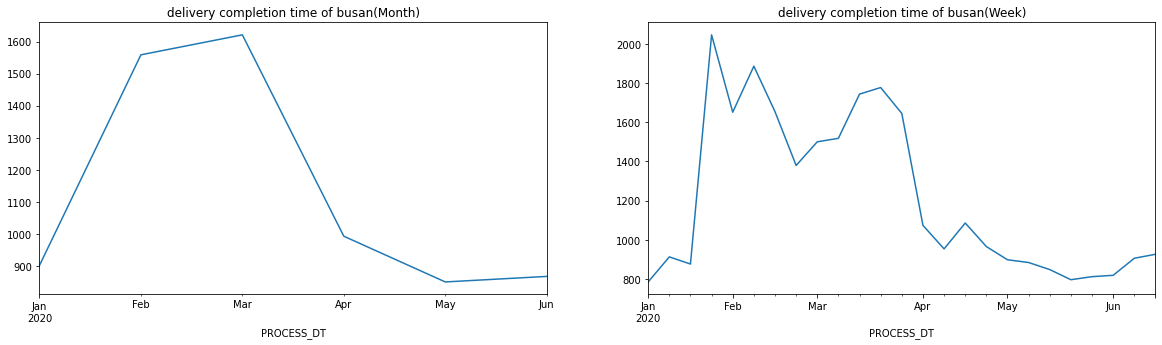

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
busan_complete_month['second'].plot(ax = axes[0])
busan_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of busan(Month)')
axes[1].set_title('delivery completion time of busan(Week)')

In [28]:
daegu = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'daegu'])
daegu['daegu'] = daegu['DLVR_DSTN_SIDO'] == '대구광역시'
droped = daegu[daegu['daegu'] == False].index
daegu = daegu.drop(droped)
daegu.index = daegu['PROCESS_DT']
daegu_complete_week = daegu.resample('W').mean()
daegu_complete_month = daegu.resample('M').mean()
daegu_complete_month.head()

,SERIAL_NUMBER,second,daegu
PROCESS_DT,,,
2020-01-31,5.057578e+06,839.178693,True
2020-02-29,6.004650e+06,797.606959,True
2020-03-31,7.200702e+06,764.483623,True
2020-04-30,8.316418e+06,799.612316,True
2020-05-31,9.459632e+06,928.826724,True


Text(0.5, 1.0, 'delivery completion time of daegu(Week)')

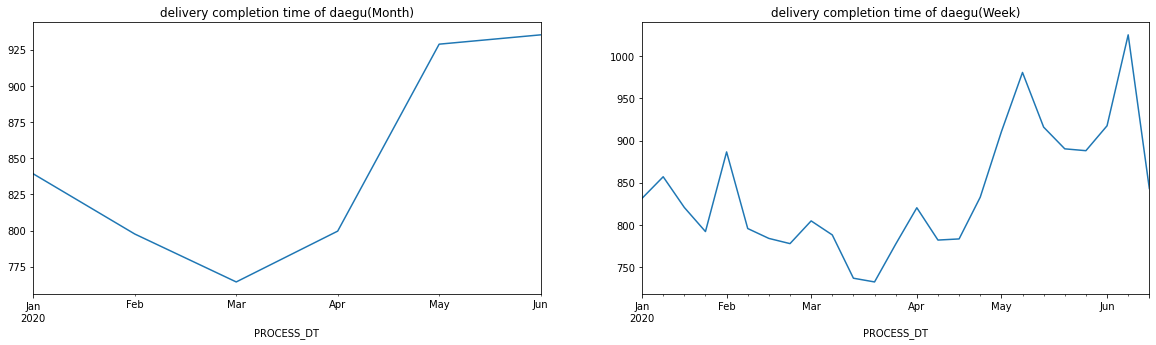

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
daegu_complete_month['second'].plot(ax = axes[0])
daegu_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of daegu(Month)')
axes[1].set_title('delivery completion time of daegu(Week)')

df dataframe에서 날짜와 지역 기준으로 delivery amount 뽑기

In [30]:
seoul = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'seoul'])
seoul['seoul'] = seoul['DLVR_DSTN_SIDO'] == '서울특별시'
droped = seoul[seoul['seoul'] == False].index
seoul = seoul.drop(droped)
seoul.index = seoul['PROCESS_DT']
seoul_amount_week = seoul.resample('W').count()
seoul_amount_month = seoul.resample('M').count()
seoul_amount_month.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
PROCESS_DT,,,,,
2020-01-31,141525,141525,141525,138986,141525
2020-02-29,150536,150536,150536,147376,150536
2020-03-31,160096,160096,160096,157413,160096
2020-04-30,147864,147864,147864,145843,147864
2020-05-31,150239,150239,150239,147965,150239


Text(0.5, 1.0, 'delivery amount time of seoul(Week)')

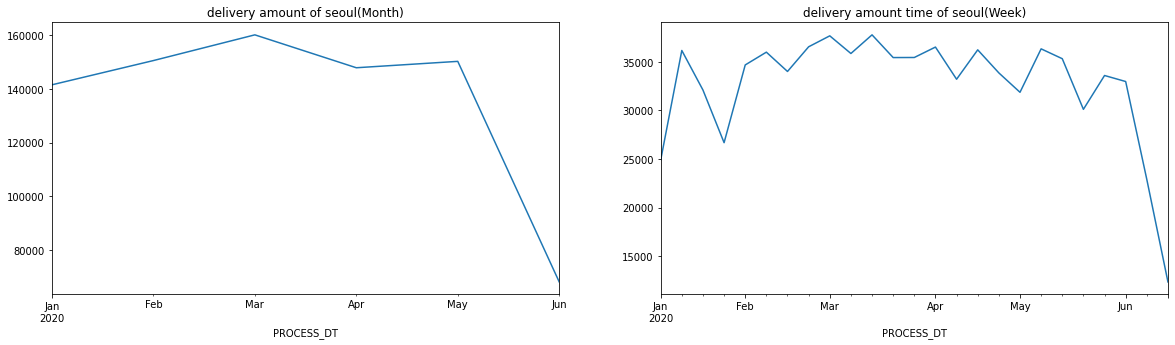

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
seoul_amount_month['seoul'].plot(ax = axes[0])
seoul_amount_week['seoul'].plot(ax = axes[1])
axes[0].set_title('delivery amount of seoul(Month)')
axes[1].set_title('delivery amount time of seoul(Week)')

In [32]:
incheon = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'incheon'])
incheon['incheon'] = incheon['DLVR_DSTN_SIDO'] == '인천광역시'
droped = incheon[incheon['incheon'] == False].index
incheon = incheon.drop(droped)
incheon.index = incheon['PROCESS_DT']
incheon_amount_week = incheon.resample('W').count()
incheon_amount_month = incheon.resample('M').count()
incheon_amount_month.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,incheon
PROCESS_DT,,,,,
2020-01-31,16060,16060,16060,15540,16060
2020-02-29,13727,13727,13727,13052,13727
2020-03-31,24740,24740,24740,24061,24740
2020-04-30,22147,22147,22147,21502,22147
2020-05-31,21027,21027,21027,20485,21027


Text(0.5, 1.0, 'delivery amount time of incheon(Week)')

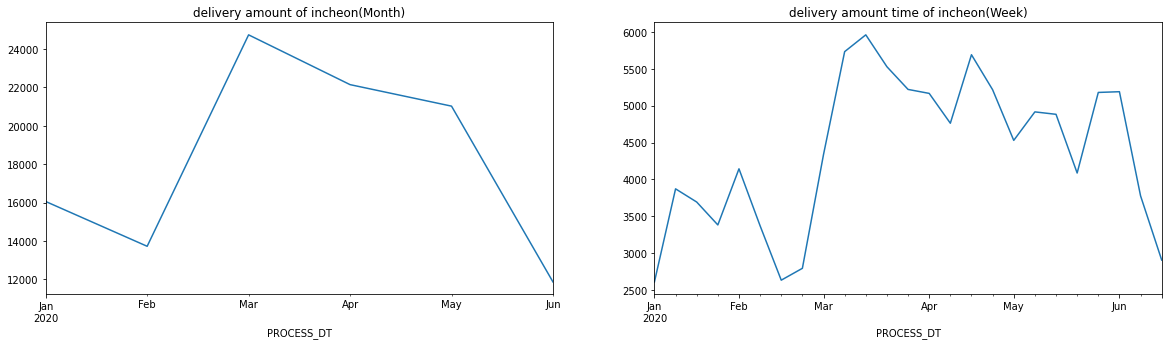

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
incheon_amount_month['incheon'].plot(ax = axes[0])
incheon_amount_week['incheon'].plot(ax = axes[1])
axes[0].set_title('delivery amount of incheon(Month)')
axes[1].set_title('delivery amount time of incheon(Week)')

Text(0.5, 1.0, 'delivery amount time of gyeonggido(Week)')

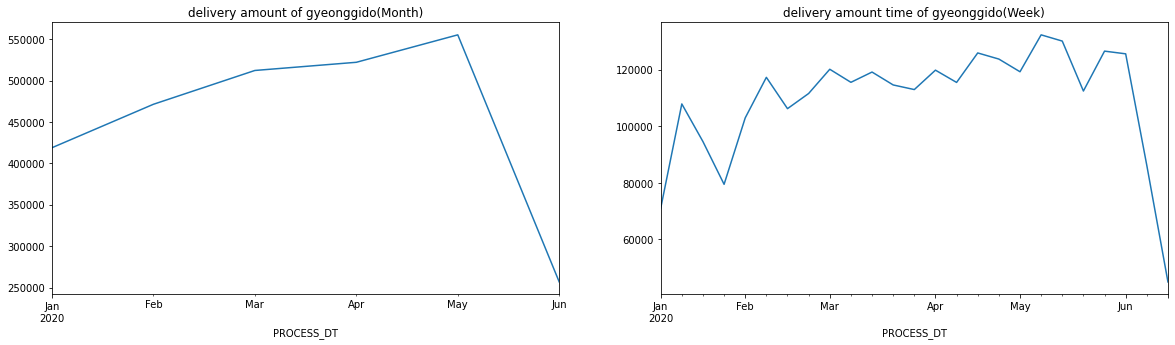

In [34]:
gyeonggido = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'gyeonggido'])
gyeonggido['gyeonggido'] = gyeonggido['DLVR_DSTN_SIDO'] == '경기도'
droped = gyeonggido[gyeonggido['gyeonggido'] == False].index
gyeonggido = gyeonggido.drop(droped)
gyeonggido.index = gyeonggido['PROCESS_DT']
gyeonggido_amount_week = gyeonggido.resample('W').count()
gyeonggido_amount_month = gyeonggido.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
gyeonggido_amount_month['gyeonggido'].plot(ax = axes[0])
gyeonggido_amount_week['gyeonggido'].plot(ax = axes[1])
axes[0].set_title('delivery amount of gyeonggido(Month)')
axes[1].set_title('delivery amount time of gyeonggido(Week)')

Text(0.5, 1.0, 'delivery amount time of busan(Week)')

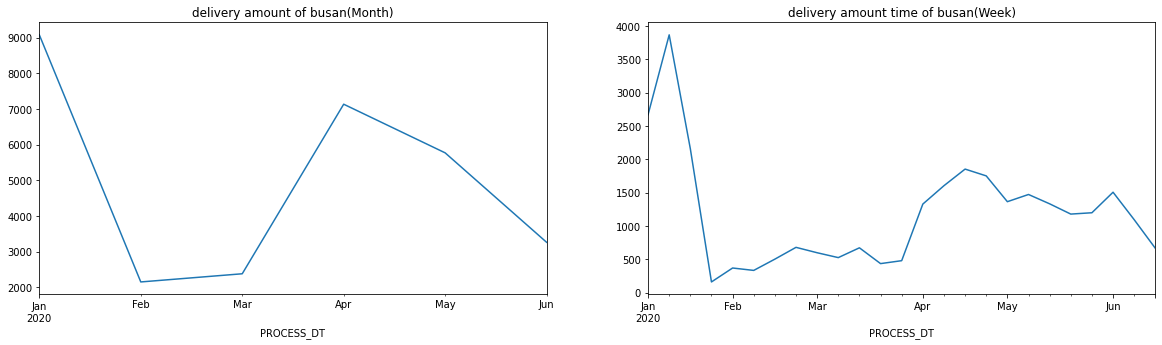

In [35]:
busan = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'busan'])
busan['busan'] = busan['DLVR_DSTN_SIDO'] == '부산광역시'
droped = busan[busan['busan'] == False].index
busan = busan.drop(droped)
busan.index = busan['PROCESS_DT']
busan_amount_week = busan.resample('W').count()
busan_amount_month = busan.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
busan_amount_month['busan'].plot(ax = axes[0])
busan_amount_week['busan'].plot(ax = axes[1])
axes[0].set_title('delivery amount of busan(Month)')
axes[1].set_title('delivery amount time of busan(Week)')

Text(0.5, 1.0, 'delivery amount time of daegu(Week)')

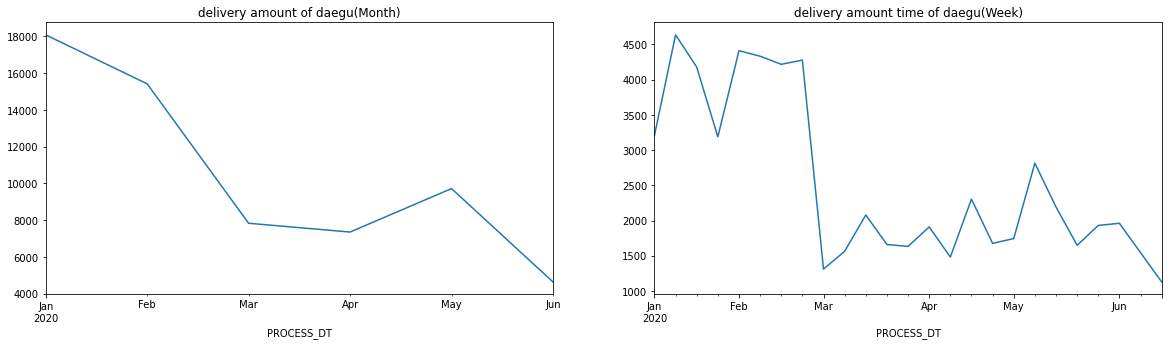

In [36]:
daegu = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'daegu'])
daegu['daegu'] = daegu['DLVR_DSTN_SIDO'] == '대구광역시'
droped = daegu[daegu['daegu'] == False].index
daegu = daegu.drop(droped)
daegu.index = daegu['PROCESS_DT']
daegu_amount_week = daegu.resample('W').count()
daegu_amount_month = daegu.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
daegu_amount_month['daegu'].plot(ax = axes[0])
daegu_amount_week['daegu'].plot(ax = axes[1])
axes[0].set_title('delivery amount of daegu(Month)')
axes[1].set_title('delivery amount time of daegu(Week)')

delivert completion time과 delivery amount의 상관계수(corr) 확인

In [42]:
seoul_corr = pd.merge(seoul_complete_month, seoul_amount_month, left_index = True, right_index = True)
seoul_corr.head()

,SERIAL_NUMBER_x,second_x,seoul_x,SERIAL_NUMBER_y,PROCESS_DT,DLVR_DSTN_SIDO,second_y,seoul_y
PROCESS_DT,,,,,,,,
2020-01-31,5.062613e+06,1168.661095,True,141525,141525,141525,138986,141525
2020-02-29,6.083589e+06,1297.683700,True,150536,150536,150536,147376,150536
2020-03-31,7.177649e+06,1180.844187,True,160096,160096,160096,157413,160096
2020-04-30,8.312214e+06,1067.320722,True,147864,147864,147864,145843,147864
2020-05-31,9.495399e+06,1110.682574,True,150239,150239,150239,147965,150239


In [47]:
seoul_corr['second_x'].corr(seoul_corr['SERIAL_NUMBER_y'])

0.26583213792362415

In [49]:
gyeonggido_corr = pd.merge(gyeonggido_complete_month, gyeonggido_amount_month, left_index = True, right_index = True)
gyeonggido_corr['second_x'].corr(gyeonggido_corr['SERIAL_NUMBER_y'])

0.0858658265583006

In [50]:
busan_corr = pd.merge(busan_complete_month, busan_amount_month, left_index = True, right_index = True)
busan_corr['second_x'].corr(busan_corr['SERIAL_NUMBER_y'])

-0.6903475285050381

In [51]:
daegu_corr = pd.merge(daegu_complete_month, daegu_amount_month, left_index = True, right_index = True)
daegu_corr['second_x'].corr(daegu_corr['SERIAL_NUMBER_y'])

-0.27580932743386866

Text(0.5, 1.0, 'delivery completion time of korea(Week)')

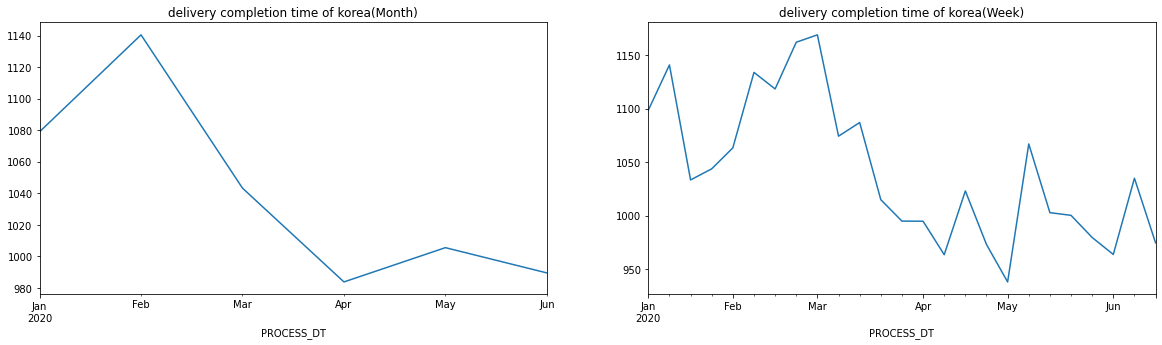

In [56]:
df.index = df['PROCESS_DT']
df_complete_week = df.resample('W').mean()
df_complete_month =df.resample('M').mean()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
df_complete_month['second'].plot(ax = axes[0])
df_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of korea(Month)')
axes[1].set_title('delivery completion time of korea(Week)')

Text(0.5, 1.0, 'delivery amount of korea(Week)')

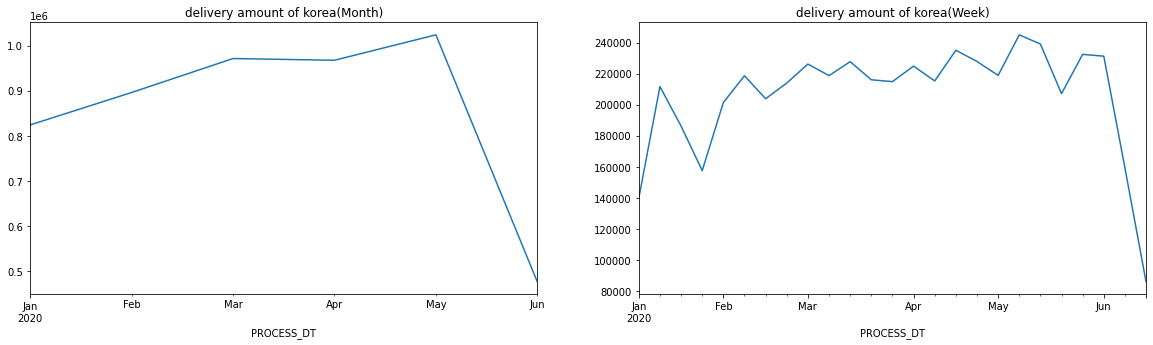

In [58]:
df_amount_week = df.resample('W').count()
df_amount_month =df.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
df_amount_month['SERIAL_NUMBER'].plot(ax = axes[0])
df_amount_week['SERIAL_NUMBER'].plot(ax = axes[1])
axes[0].set_title('delivery amount of korea(Month)')
axes[1].set_title('delivery amount of korea(Week)')

In [62]:
korea_corr = pd.merge(df_complete_month, df_amount_month, left_index = True, right_index = True)
korea_corr['second_x'].corr(korea_corr['SERIAL_NUMBER_y'])

0.9999441621491576

# 결론: 코로나 이후 배달량의 증가와 배달 완료 시간은 상관계